# About the notebook

In [6]:
library(flowMatch)
library(healthyFlowData)

# Import sample data

In [11]:
## ------------------------------------------------
## load data and retrieve a sample
## ------------------------------------------------
data(hd)
hd.flowSet

A flowSet with 20 experiments.

An object of class 'AnnotatedDataFrame'
  rowNames: A_1 A_2 ... D_5 (20 total)
  varLabels: subject replicate Name
  varMetadata: labelDescription

  column names:
  CD4 CD8 CD3 CD19

get the expression matrix

In [9]:
sample = exprs(hd.flowSet[[1]])
dim(sample)

# Kmeans clustering

In [12]:
## ------------------------------------------------
## cluster sample using kmeans algorithm
## ------------------------------------------------
km = kmeans(sample, centers=4, nstart=20)
cluster.labels = km$cluster

length(cluster.labels)

store the kmean results and combine it with the expression matrix; there are two options

In [19]:
## ------------------------------------------------
## Create ClusteredSample object (Option 1 )
## without specifying centers and covs
## we need to pass FC sample for paramter estimation
## ------------------------------------------------
clustSample = ClusteredSample(labels = cluster.labels, sample = sample)
slotNames(clustSample)

[1] "num.clusters" "labels"       "clusters"     "dimension"    "size"        
[6] "sample.id"

In [25]:
## ------------------------------------------------
## Create ClusteredSample object (Option 2)
## specifying centers and covs
## no need to pass the sample
## ------------------------------------------------
centers = list()
covs = list()
num.clusters = nrow(km$centers)

for(i in 1:num.clusters) {
    centers[[i]] = km$centers[i, ]
    covs[[i]]    = cov(sample[cluster.labels==i, ])
} # end for loop

# Now we do not need to pass sample
clustSample = ClusteredSample(labels = cluster.labels, centers = centers, covs = covs)

summarize the combined kmeans label and sample

In [26]:
summary(clustSample)

An Object of class 'ClusteredSample'
Number of clusters: 4
Number of cells in cluster 1: 10535 [ 54.5 % ]
Number of cells in cluster 2: 1658 [ 8.6 % ]
Number of cells in cluster 3: 2729 [ 14.1 % ]
Number of cells in cluster 4: 4399 [ 22.8 % ]


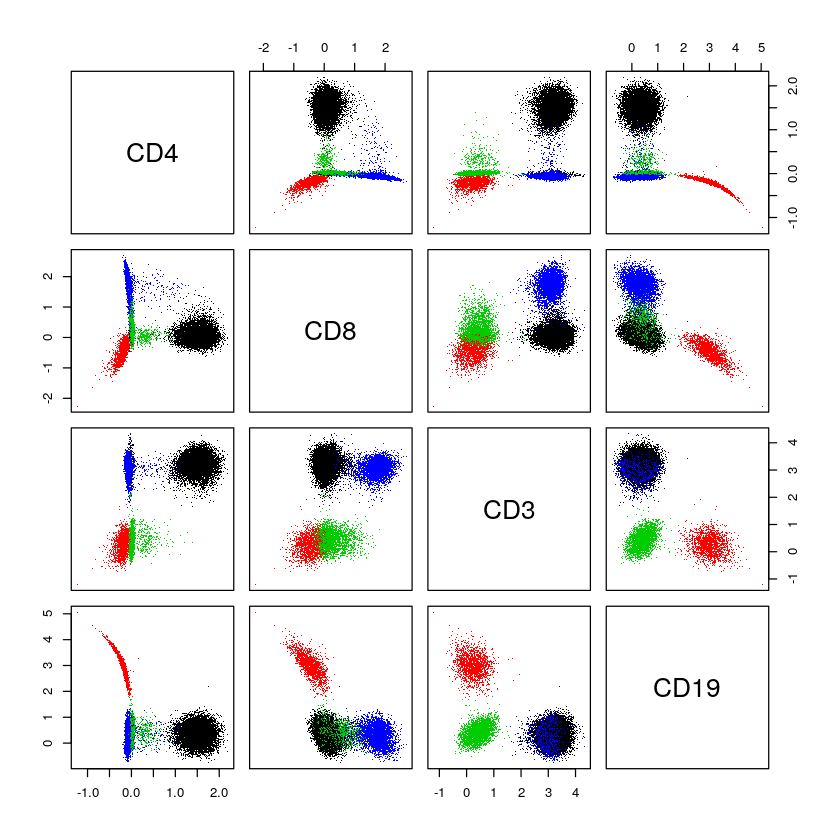

In [30]:
plot(sample, clustSample)

# Matching cell clusters across a pair of samples

load two samples

In [32]:
## ------------------------------------------------
## load data and retrieve two samples
## ------------------------------------------------
data(hd)
sample1 = exprs(hd.flowSet[[1]])
sample2 = exprs(hd.flowSet[[2]])

perform kmeans algorithm on these two samples and get the cluster labels

In [33]:
## ------------------------------------------------
## cluster samples using kmeans algorithm
## ------------------------------------------------
clust1 = kmeans(sample1, centers=4, nstart=20)
clust2 = kmeans(sample2, centers=4, nstart=20)
cluster.labels1 = clust1$cluster
cluster.labels2 = clust2$cluster

combine the labels and expression matrix

In [34]:
## ------------------------------------------------
## Create ClusteredSample objects
## ------------------------------------------------
clustSample1 = ClusteredSample(labels=cluster.labels1, sample=sample1)
clustSample2 = ClusteredSample(labels=cluster.labels2, sample=sample2)

match two clusters

In [35]:
## ------------------------------------------------
## Computing matching of clusteres
## An object of class "ClusterMatch" is returned
## ------------------------------------------------

mec = match.clusters(clustSample1, clustSample2, dist.type="Mahalanobis", unmatch.penalty=99999)
class(mec) #[1] "ClusterMatch" attr(,"package")[1] "flowMatch"
summary(mec)

[1] "ClusterMatch"
attr(,"package")
[1] "flowMatch"

clusters/meta-clusters      matched clusters/meta-clusters
from sample1/template1      sample2/template2 
           1                            3
           2                            2
           3                            4
           4                            1
